# Pre-Lab Exercise

## Step 2

In [1]:
import nltk
nltk.download('brown')
nltk.download('stopwords')

[nltk_data] Downloading package brown to /Users/keirp/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/keirp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
from nltk.corpus import brown
W = nltk.FreqDist([w.lower() for w in brown.words() if any(c.isalpha() for c in w)]).most_common(5000)
W = [w[0] for w in W]

In [3]:
word_list = [('cord', 'smile', 0.02),
             ('rooster', 'voyage', 0.04),
             ('noon', 'string', 0.04), 
             ('fruit', 'furnace', 0.05), 
             ('autograph', 'shore', 0.06), 
             ('automobile', 'wizard', 0.11),
             ('mound', 'stove', 0.14), 
             ('grin', 'implement', 0.18), 
             ('asylum', 'fruit', 0.19),
             ('asylum','monk', 0.39), 
             ('graveyard', 'madhouse', 0.42),
             ('glass', 'magician', 0.44),
             ('boy', 'rooster', 0.44),
             ('cushion', 'jewel', 0.45),
             ('monk', 'slave', 0.57),
             ('asylum', 'cemetery', 0.79),
             ('coast', 'forest', 0.85),
             ('grin', 'lad', 0.88),
             ('shore', 'woodland', 0.90),
             ('monk', 'oracle', 0.91),
             ('boy', 'sage', 0.96),
             ('automobile', 'cushion', 0.97),
             ('mound', 'shore', 0.97),
             ('lad', 'wizard', 0.99),
             ('forest', 'graveyard', 1.00),
             ('food', 'rooster', 1.09),
             ('cemetery', 'woodland', 1.18),
             ('shore', 'voyage', 1.22),
             ('bird', 'woodland', 1.24),
             ('coast', 'hill', 1.26),
             ('furnace', 'implement', 1.37),
             ('crane', 'rooster', 1.41),
             ('hill', 'woodland', 1.48),
             ('car', 'journey', 1.55),
             ('cemetery', 'mound', 1.69),
             ('glass', 'jewel', 1.78),
             ('magician', 'oracle', 1.82),
             ('crane', 'implement', 2.37),
             ('brother', 'lad', 2.41),
             ('sage', 'wizard', 2.46),
             ('oracle', 'sage', 2.61),
             ('bird', 'crane', 2.63),
             ('bird', 'cock', 2.63),
             ('food', 'fruit', 2.69),
             ('brother', 'monk', 2.74),
             ('asylum', 'madhouse', 3.04),
             ('furnace', 'stove', 3.11),
             ('magician', 'wizard', 3.21),
             ('hill', 'mound', 3.29),
             ('cord', 'string', 3.41),
             ('glass', 'tumbler', 3.45),
             ('grin', 'smile', 3.46),
             ('serf', 'slave', 3.46),
             ('journey', 'voyage', 3.58),
             ('autograph', 'signature', 3.59),
             ('coast', 'shore', 3.60),
             ('forest', 'woodland', 3.65),
             ('implement', 'tool', 3.66),
             ('cock', 'rooster', 3.68),
             ('boy', 'lad', 3.82),
             ('cushion', 'pillow', 3.84),
             ('cemetery', 'graveyard', 3.88),
             ('automobile', 'car', 3.92),
             ('midday', 'noon', 3.94),
             ('gem', 'jewel', 3.94)]

In [4]:
print(f'5 most common words: {W[:5]}')
print(f'5 least common words: {W[-5:]}')

5 most common words: ['the', 'of', 'and', 'to', 'a']
5 least common words: ['cottage', 'lid', 'packed', 'lacked', 'condemned']


In [5]:
added = []
for pair in word_list:
    w0, w1 = pair[0], pair[1]
    if w0 not in W:
        W.append(w0)
        added.append(w0)
    if w1 not in W:
        W.append(w1)
        added.append(w1)
print(f'Added {added} to W.')

Added ['cord', 'rooster', 'voyage', 'furnace', 'autograph', 'wizard', 'mound', 'stove', 'grin', 'implement', 'asylum', 'monk', 'graveyard', 'madhouse', 'magician', 'cushion', 'jewel', 'cemetery', 'lad', 'woodland', 'oracle', 'sage', 'crane', 'cock', 'tumbler', 'serf', 'signature', 'pillow', 'midday', 'gem'] to W.


In [6]:
print(f'W has a size of {len(W)}')

W has a size of 5030


## Step 3

In [7]:
from scipy.sparse import lil_matrix
from tqdm.notebook import tqdm

In [12]:
M1 = lil_matrix((len(W), len(W)))
bgs = list(nltk.bigrams(brown.words()))

for i, w in tqdm(enumerate(W)):
    bigram_freq = nltk.FreqDist(bs for bs in bgs if bs[1] == w and bs[0] in W)
    for freq in list(bigram_freq.items()):
        ctx_word = freq[0][0]
        count = freq[1]
        if ctx_word in W:
            ctx_idx = W.index(ctx_word)
            M1[i, ctx_idx] = count

0it [00:00, ?it/s]

KeyboardInterrupt: 

## Step 4

In [8]:
import scipy.sparse
# scipy.sparse.save_npz('M1.npz', M1.tocsr())
M1 = scipy.sparse.load_npz('M1.npz')

In [9]:
import numpy as np

Pwc = M1 / M1.sum()
Pw = M1.sum(axis=1)
Pw = Pw / Pw.sum()
Pc = M1.sum(axis=0)
Pc = Pc / Pc.sum()
D = Pw * Pc
Df = D[:, :]
Df[D == 0] = 1
M1Plus = np.maximum(np.log2(Pwc / Df), 0)
M1Plus[D == 0] = 0

np.save('M1plus.np', M1Plus)

/var/folders/b0/k4x351w96kdf2007y_j6dzh40000gn/T/ipykernel_34057/2392178488.py:11: RuntimeWarning: divide by zero encountered in log2
  M1Plus = np.maximum(np.log2(Pwc / Df), 0)


## Step 5

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
M2_10 = pca.fit_transform(M1Plus)

pca = PCA(n_components=100)
M2_100 = pca.fit_transform(M1Plus)

pca = PCA(n_components=300)
M2_300 = pca.fit_transform(M1Plus)

## Step 7

In [11]:
from sklearn.metrics.pairwise import cosine_similarity

def get_similarity(model, idx=True):
    s = []
    for pair in word_list:
        if idx:
            i0, i1 = W.index(pair[0]), W.index(pair[1])
            r0, r1 = model[i0], model[i1]
        else:
            r0, r1 = model[pair[0]], model[pair[1]]
        s.append(cosine_similarity(r0.reshape(1, -1), r1.reshape(1, -1)))
    return np.array(s, dtype='float').flatten()

In [12]:
SM1 = get_similarity(M1.toarray())
SM1Plus = get_similarity(M1Plus)
SM2_10 = get_similarity(M2_10)
SM2_100 = get_similarity(M2_100)
SM2_300 = get_similarity(M2_300)

## Step 8

In [13]:
from scipy.stats import pearsonr

S = np.array([pair[2] for pair in word_list], dtype='float')

pM1 = pearsonr(SM1, S)[0]
pM1Plus = pearsonr(SM1Plus, S)[0]
pM2_10 = pearsonr(SM2_10, S)[0]
pM2_100 = pearsonr(SM2_100, S)[0]
pM2_300 = pearsonr(SM2_300, S)[0]

print(f'Pearson correlation for M1: {pM1:0.2f}')
print(f'Pearson correlation for M1Plus: {pM1Plus:0.2f}')
print(f'Pearson correlation for M2_10: {pM2_10:0.2f}')
print(f'Pearson correlation for M2_100: {pM2_100:0.2f}')
print(f'Pearson correlation for M2_300: {pM2_300:0.2f}')

Pearson correlation for M1: 0.16
Pearson correlation for M1Plus: 0.31
Pearson correlation for M2_10: 0.17
Pearson correlation for M2_100: 0.37
Pearson correlation for M2_300: 0.35


# Synchronic word embedding

## Step 2

In [14]:
from gensim.models import KeyedVectors

In [15]:
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [16]:
embeddings = {}
for pair in word_list:
    embeddings[pair[0]] = model[pair[0]]
    embeddings[pair[1]] = model[pair[1]]

## Step 3

In [17]:
SE = get_similarity(embeddings, idx=False)

In [18]:
pSE = pearsonr(SE, S)[0]
print(f'Pearson correlation for word embeddings: {pSE:0.2f}')

Pearson correlation for word embeddings: 0.77


## Step 4

In [19]:
# parse analogy test
test_set = []
syntactic = ['gram1-adjective-to-adverb', 'gram2-opposite', 'gram3-comparative', 'gram4-superlative',
             'gram5-present-participle', 'gram6-nationality-adjective', 'gram7-past-tense',
             'gram8-plural', 'gram9-plural-verbs']
semantic = ['capital-common-countries', 'capital-world', 'currency', 'city-in-state', 'family']

syntactic_test_set = []
semantic_test_set = []

with open('word-test.v1.txt', 'r') as file:
    curr_cat = None
    for line in file.readlines():
        if '//' in line:
            continue
        if ':' in line:
            category = line.split(' ')[-1]
            curr_cat = category.strip()
            continue
        words = line.strip().replace('\t', '').split(' ')
        valid = True
        for word in words:
            if word not in W:
                valid = False
                break
        if valid:
            if curr_cat in syntactic:
                syntactic_test_set.append(words)
            else:
                semantic_test_set.append(words)
print(f'Syntactic test set size: {len(syntactic_test_set)}')
print(f'Semantic test set size: {len(semantic_test_set)}')

Syntactic test set size: 1992
Semantic test set size: 90


In [20]:
def evaluate_analogy(model, test_set, idx=True):
    correct = 0
    for words in tqdm(test_set):
        if idx:
            rs = [model[W.index(word)] for word in words]
        else:
            rs = [model[word] for word in words]
        guess_r = rs[2] + rs[1] - rs[0]
        if idx:
            dists = [(np.sqrt(((model[i] - guess_r) ** 2).sum()), W[i]) for i in range(len(W))]
        else:
            dists = [(np.sqrt(((model[w] - guess_r) ** 2).sum()), w) for w in W if w in model]
        guess_word = min(dists, key=lambda x: x[0])[1]
        if guess_word == words[3]:
            correct += 1
    return correct / len(test_set)

In [21]:
w2v_acc_syn = evaluate_analogy(model, syntactic_test_set, idx=False)
LSA_acc_syn = evaluate_analogy(M2_300, syntactic_test_set)
w2v_acc_sem = evaluate_analogy(model, semantic_test_set, idx=False)
LSA_acc_sem = evaluate_analogy(M2_300, semantic_test_set)

  0%|          | 0/1992 [00:00<?, ?it/s]

  0%|          | 0/1992 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

In [22]:
print(f'word2vec syntactic analogy accuracy: {w2v_acc_syn * 100:0.2f}%')
print(f'LSA syntactic analogy accuracy: {LSA_acc_syn * 100:0.2f}%')
print(f'word2vec semantic analogy accuracy: {w2v_acc_sem * 100:0.2f}%')
print(f'LSA semantic analogy accuracy: {LSA_acc_sem * 100:0.2f}%')

word2vec syntactic analogy accuracy: 10.99%
LSA syntactic analogy accuracy: 0.00%
word2vec semantic analogy accuracy: 58.89%
LSA semantic analogy accuracy: 1.11%


# Diachronic word embedding

## Step 1

In [109]:
import pickle
with open('embeddings/data.pkl', 'rb') as file:
    data = pickle.load(file)
print(data.keys())
w_data, d_data, E = data['w'], data['d'], data['E']

dict_keys(['w', 'd', 'E'])


## Step 2

### Method 1: k-NN Set Difference

In [12]:
import jax
import jax.numpy as jnp

In [18]:
from tqdm.notebook import tqdm
import numpy as np

def get_nns():
    w, d = 2000, 10
    nns = []
    
    E_norm = []
    for w in range(len(E)):
        wl = []
        for d in range(len(E[w])):
            wl.append(E[w][d] / np.linalg.norm(E[w][d]))
        E_norm.append(wl)
    
    for w in tqdm(range(len(E))):
        nn_w = []
        for d in range(len(E[w])):
            word_vec = E_norm[w][d]
            w_dists = []
            for wp in range(len(E)):
                dist = 1 - E_norm[wp][d].T.dot(word_vec)
                w_dists.append((wp, dist))
            w_dists = sorted(w_dists, key=lambda x: x[1])
            nn = [x[0] for x in w_dists]
            nn.remove(w) # itself is not a nearest neighbor
            nn_w.append(nn)
        nns.append(nn_w)
    return nns

nns = get_nns()

/var/folders/b0/k4x351w96kdf2007y_j6dzh40000gn/T/ipykernel_46294/1044306286.py:12: RuntimeWarning: invalid value encountered in true_divide
  wl.append(E[w][d] / np.linalg.norm(E[w][d]))


  0%|          | 0/2000 [00:00<?, ?it/s]

In [54]:
E_np = np.array(E)
E_nns = np.array(nns)

In [55]:
k = 10
set_diffs = []
overall_set_diffs = []
for w in range(len(E)):
    w_diffs = []
    for d in range(len(E[w])):
        cur_set = set(nns[w][d][:k])
        if d == 0:
            w_diffs.append(None)
        else:
            w_diffs.append(len(cur_set.difference(prev_set)))
        prev_set = cur_set
    set_diffs.append(w_diffs)
    
    overall_set_diffs.append(len(set(nns[w][0][:k]).difference(set(nns[w][-1][:k]))))
    
sorted_set_diffs = [x[0] for x in sorted(enumerate(overall_set_diffs), key=lambda x: x[1])]
most_set_diffs = [w_data[x] for x in sorted_set_diffs[-20:]]
least_set_diffs = [w_data[x] for x in sorted_set_diffs[:20]]

print(f'Most changed words according to set difference: {most_set_diffs}')
print(f'Least changed words according to set difference: {least_set_diffs}')

Most changed words according to set difference: ['commissioner', 'radio', 'housing', 'transport', 'measurement', 'skills', 'component', 'objectives', 'assessment', 'mcgraw', 'ml', 'disposition', 'perspective', 'host', 'adjustment', 'absorption', 'challenge', 'framework', 'imports', 'intervention']
Least changed words according to set difference: ['march', 'june', 'july', 'april', 'january', 'december', 'october', 'august', 'september', 'november', 'february', 'time', 'years', 'father', 'north', 'increase', 'mother', 'woman', 'months', 'east']


### Method 2: Linear Projection Between Embeddings

In [60]:
batch_size = 100
learning_rate = 1000

def get_linear_alignment(d_from, d_to, k):
    idxs = E_nns[:, d_from, :k].reshape(-1)
    
    from_r = jnp.array(E_np[idxs][:, d_from, :].reshape(2000, k, -1))
    to_r = jnp.array(E_np[idxs][:, d_to, :].reshape(2000, k, -1))
    
    W = np.random.randn(300, 300)
    
    def loss(W, from_r, to_r):
        fr = from_r.reshape(-1, 300) @ W
        tr = to_r.reshape(-1, 300)
        return ((fr - tr) ** 2).mean()
    
    loss_grad = jax.jit(jax.vmap(jax.grad(loss), in_axes=(None, 0, 0), out_axes=0))
    
    for i in range(1000):
        idx = np.random.choice(from_r.shape[0], size=batch_size)
        x = from_r[idx]
        y = to_r[idx]
        grad = loss_grad(W, x, y)
        
        W = W - learning_rate * np.mean(grad, axis=0)
        
        if i % 100 == 0:
            print(loss(W, x, y))
            
    return lambda x: x.reshape(-1, 300) @ W
t_0_9 = get_linear_alignment(0, 9, 5)

0.8430913
0.042350337
0.014300892
0.007239037
0.0042550648
0.003050912
0.0022832882
0.0018479003
0.0015794423
0.0015226732


In [167]:
from sklearn.metrics.pairwise import cosine_similarity

linear_diffs = []
for w in range(len(E)):
    og_embed = t_0_9(E[w][0])
    now_embed = E[w][9]
    diff = 1 - cosine_similarity(now_embed.reshape(1, -1), og_embed.reshape(1, -1))
    linear_diffs.append(diff)
    
sorted_linear_diffs = [x[0] for x in sorted(enumerate(linear_diffs), key=lambda x: x[1])]
most_linear_diffs = [w_data[x] for x in sorted_linear_diffs[-20:]]
least_linear_diffs = [w_data[x] for x in sorted_linear_diffs[:20]]

print(f'Most changed words according to linear difference: {most_linear_diffs}')
print(f'Least changed words according to linear difference: {least_linear_diffs}')

Most changed words according to linear difference: ['jones', 'patterns', 'berkeley', 'framework', 'film', 'j', 'evaluation', 'therapy', 'perspective', 'media', 'radio', 'sector', 'goals', 'programs', 'techniques', 'skills', 'mcgraw', 'ml', 'computer', 'objectives']
Least changed words according to linear difference: ['happiness', 'plaintiff', 'payment', 'density', 'john', 'joy', 'god', 'particles', 'funds', 'assets', 'university', 'jersey', 'metal', 'officers', 'manufacture', 'court', 'door', 'april', 'opinions', 'troops']


### Method 3: Non-Linear Projection Between Embeddings

In [105]:
def get_nonlinear_alignment(d_from, d_to, k):
    batch_size = 50
    learning_rate = 0.3
    
    idxs = E_nns[:, d_from, :k].reshape(-1)
    
    from_r = jnp.array(E_np[idxs][:, d_from, :].reshape(2000, k, -1))
    to_r = jnp.array(E_np[idxs][:, d_to, :].reshape(2000, k, -1))
    
    params = [
        np.random.randn(256, 300),
        np.random.randn(256, 1),
        np.random.randn(300, 256)
    ]
    
    def loss(params, from_r, to_r):
        fr = net(params, from_r.reshape(-1, 300).T)
        tr = to_r.reshape(-1, 300).T
        return ((fr - tr) ** 2).mean() + 0 * sum([jnp.linalg.norm(param) for param in params])
    
    def net(params, x):
        w1, b1, w2 = params
        hidden = w1 @ x + b1
        hidden = hidden * (hidden > 0)
#         hidden = jnp.tanh(w1 @ x + b1)
        return w2 @ hidden
    
    loss_grad = jax.jit(jax.vmap(jax.grad(loss), in_axes=(None, 0, 0), out_axes=0))

    print('Starting learning...')
    
    for i in range(5000):
        idx = np.random.choice(from_r.shape[0], size=batch_size)
        x = from_r[idx]
        y = to_r[idx]
        grads = loss_grad(params, x, y)
        
        params = [param - learning_rate * np.mean(grad, axis=0) for param, grad in zip(params, grads)]
                
        if i % 500 == 0:
            print(loss(params, x, y))
            
    return lambda x: net(params, x.reshape(-1, 300).T)
nonlinear_0_9 = get_nonlinear_alignment(0, 9, 5)

Starting learning...
79.46014
0.064915486
0.015159759
0.016637193
0.0075505045
0.0058683795
0.004713276
0.004751912
0.006121097
0.0051645515


In [106]:
from sklearn.metrics.pairwise import cosine_similarity

nonlinear_diffs = []
for w in range(len(E)):
    og_embed = nonlinear_0_9(E[w][0])
    now_embed = E[w][9]
    diff = 1 - cosine_similarity(now_embed.reshape(1, -1), og_embed.reshape(1, -1))
    nonlinear_diffs.append(diff)
    
sorted_nonlinear_diffs = [x[0] for x in sorted(enumerate(nonlinear_diffs), key=lambda x: x[1])]
most_nonlinear_diffs = [w_data[x] for x in sorted_nonlinear_diffs[-20:]]
least_nonlinear_diffs = [w_data[x] for x in sorted_nonlinear_diffs[:20]]

print(f'Most changed words according to non-linear difference: {most_nonlinear_diffs}')
print(f'Least changed words according to non-linear difference: {least_nonlinear_diffs}')

Most changed words according to non-linear difference: ['cents', 'spot', 'difference', 'remainder', 'roads', 'host', 'nitrogen', 'mayor', 'guide', 'sunday', 'vision', 'c', 'technology', 'preservation', 'matter', 'sequence', 'trustees', 'representation', 'francisco', 'dozen']
Least changed words according to non-linear difference: ['associations', 'dog', 'mixture', 'son', 'tons', 'discovery', 'proportion', 'privileges', 'charges', 'expenditure', 'articles', 'ears', 'machine', 'contents', 'defeat', 'buildings', 'favor', 'lives', 'quarters', 'grace']


### Correlations

In [107]:
from scipy.stats import pearsonr

inter_correlation_table = np.zeros((3, 3), dtype='float')
methods_diffs = [np.array(overall_set_diffs, dtype='float').reshape(-1),
                 np.array(linear_diffs, dtype='float').reshape(-1),
                 np.array(nonlinear_diffs, dtype='float').reshape(-1)]
for i, m1 in enumerate(methods_diffs):
    for j, m2 in enumerate(methods_diffs):
        inter_correlation_table[i, j] = pearsonr(m1, m2)[0]
        
print(inter_correlation_table)

[[1.         0.43554636 0.02391419]
 [0.43554636 1.         0.04075642]
 [0.02391419 0.04075642 1.        ]]


## Step 3

In [252]:
import csv
changed_words = set()
with open('data.csv/20WordsEvaluator1.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in reader:
        if row[2] == '1':
            changed_words.add(row[0])
with open('data.csv/20WordsEvaluator2.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in reader:
        if row[2] == '1':
            changed_words.add(row[0])
with open('data.csv/20WordsEvaluator3.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in reader:
        if row[2] == '1':
            changed_words.add(row[0])
with open('data.csv/ChangedWords.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in reader:
        if row[0] != 'Source':
            changed_words.add(row[-1])
            
print(changed_words)
print(len(changed_words))

{'killer', 'bloody', 'chase', 'passenger', 'gay', 'prize', 'nice', 'tag', 'address', 'ass', 'mail', 'check', 'bus', 'urge', 'concrete', 'random', 'sip', 'bomb', 'mouse', 'guy', 'sob', 'toilet', 'cell', 'gorgeous', 'frustration', 'king', 'breasts', 'checked', 'repeat', 'cock', 'tape', 'supposed', 'sleep', 'phone', 'switched', 'parent', 'damn', 'press', 'disbelief', 'papa', 'shower', 'motor', 'plan', 'headed', 'cancer', 'actually', 'intelligence', 'steering', 'card', 'guess'}
50


In [254]:
most_nonlinear_diffs = [w_data[x] for x in sorted_nonlinear_diffs[-500:]]
accurate_words_nonlinear = len(set(most_nonlinear_diffs).intersection(changed_words)) / len(changed_words)
most_linear_diffs = [w_data[x] for x in sorted_linear_diffs[-500:]]
accurate_words_linear = len(set(most_linear_diffs).intersection(changed_words)) / len(changed_words)
most_set_diffs = [w_data[x] for x in sorted_set_diffs[-500:]]
accurate_words_set = len(set(most_set_diffs).intersection(changed_words)) / len(changed_words)

print(f'Set method accuracy: {accurate_words_set * 100:0.2f}%')
print(f'Linear method accuracy: {accurate_words_linear * 100:0.2f}%')
print(f'Non-Linear method accuracy: {accurate_words_nonlinear * 100:0.2f}%')

Set method accuracy: 4.00%
Linear method accuracy: 14.00%
Non-Linear method accuracy: 2.00%


## Step 4

In [165]:
linear_alignments = [get_linear_alignment(i, 9, 5) for i in range(9)]

0.835669
0.043057866
0.01485128
0.006860097
0.004250046
0.002866014
0.002153203
0.0018217659
0.0015927523
0.0014362903
0.8349303
0.042131353
0.014539286
0.0072084162
0.00437981
0.0029221885
0.0022032203
0.0017838338
0.0016108836
0.0013583984
0.8334937
0.04290511
0.015034596
0.00726867
0.0046399725
0.0028980728
0.002201997
0.0017579643
0.0015592147
0.001379823
0.82984793
0.043604556
0.014073392
0.007085586
0.004252657
0.0029357327
0.002015209
0.0017607816
0.001440743
0.0012737002
0.82835585
0.042047475
0.013104712
0.006315336
0.0037249357
0.0025937164
0.0019446043
0.0015739321
0.0013490735
0.0012492061
0.8394355
0.04174356
0.013362069
0.0061926562
0.003544242
0.0024273393
0.0018367979
0.0015114009
0.0013357415
0.0012416287
0.8317495
0.041528217
0.013087565
0.0062037664
0.0035474824
0.0023399217
0.0018041256
0.0014586642
0.0012946494
0.0011842522
0.8424791
0.041771203
0.013004456
0.0061262134
0.0034697615
0.00232162
0.0016626044
0.0013966467
0.0012212668
0.0010895497
0.8391374
0.04133865

In [210]:
linear_diffs_T = []
for t in range(9):
    diffs = []
    for w in range(len(E)):
        og_embed = linear_alignments[t](E[w][t])
        now_embed = E[w][9]
        diff = 1 - cosine_similarity(now_embed.reshape(1, -1), og_embed.reshape(1, -1))
        diffs.append(diff)
    linear_diffs_T.append(diffs)
    
linear_diffs_T = np.array(linear_diffs_T).reshape(9, 2000)

In [211]:
means = linear_diffs_T.mean(axis=1, keepdims=True)
variances = np.var(linear_diffs_T, axis=1, keepdims=True)
norm_linear_diff_T = (linear_diffs_T - means) / np.sqrt(variances)

In [219]:
def get_ks(Z):
    ks = []
    for t in range(1, 8):
        beginning = Z[:t]
        end = Z[t:]
        ks.append(beginning.mean(axis=0) - end.mean(axis=0))
    ks = np.array(ks)
    return ks

In [223]:
ks_og = get_ks(norm_linear_diff_T)
BS = []
for b in range(3000):
    pi_z = np.random.permutation(norm_linear_diff_T)
    ks = get_ks(pi_z)
    BS.append(ks)
p_values = np.zeros((ks.shape[1], ks.shape[0]))
for w in tqdm(range(ks.shape[1])):
    for t in range(ks_og.shape[0]):
        n_greater = 0
        for b in range(3000):
            if BS[b][t, w] > ks_og[t, w]:
                n_greater += 1
        p_values[w, t] = n_greater / 3000

  0%|          | 0/2000 [00:00<?, ?it/s]

In [248]:
most_changed_words = ['jones', 'patterns', 'berkeley']
idxs = [w_data.index(w) for w in most_changed_words]
diff_TS = []
for w in range(len(most_changed_words)):
    diffs = []
    for t in range(9):
        diffs.append(linear_diffs_T[t, idxs[w]].item())
    diff_TS.append(diffs)

In [249]:
years = [1900 + i * 10 for i in range(1, 10)]

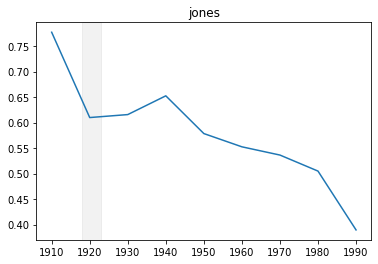

In [255]:
%matplotlib inline
import matplotlib.pyplot as plt

idx = 0
plt.plot(years, diff_TS[idx])
plt.title(most_changed_words[idx])

change_pt = np.argmin(p_values[idxs[idx]]) + 1
region = 1908 + change_pt * 10, 1913 + change_pt * 10
plt.axvspan(region[0], region[1], color='grey', alpha=0.1)

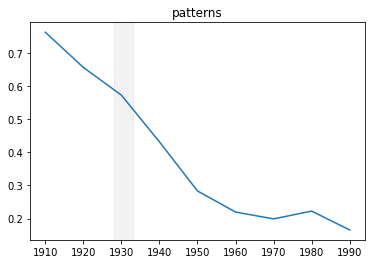

In [256]:
%matplotlib inline
import matplotlib.pyplot as plt

idx = 1
plt.plot(years, diff_TS[idx])
plt.title(most_changed_words[idx])

change_pt = np.argmin(p_values[idxs[idx]]) + 1
region = 1908 + change_pt * 10, 1913 + change_pt * 10
plt.axvspan(region[0], region[1], color='grey', alpha=0.1)

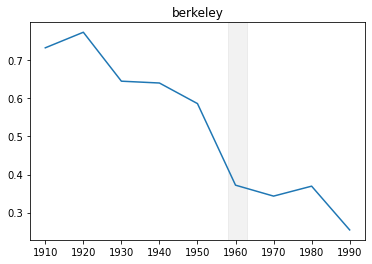

In [257]:
%matplotlib inline
import matplotlib.pyplot as plt

idx = 2
plt.plot(years, diff_TS[idx])
plt.title(most_changed_words[idx])

change_pt = np.argmin(p_values[idxs[idx]]) + 1
region = 1908 + change_pt * 10, 1913 + change_pt * 10
plt.axvspan(region[0], region[1], color='grey', alpha=0.1)